In [1]:
!git clone https://github.com/eburdette0/DecompressionData.git

Cloning into 'DecompressionData'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 19 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


In [3]:
!ls DecompressionData/

Decompress1.bmp    Forward1.bmp  README.md		W2623_Decompress2HP.csv
Decompress2.bmp    Forward2.bmp  W2623_Decompress1.csv	W2623_Forward1.csv
Decompress2HP.bmp  LICENSE	 W2623_Decompress2.csv	W2636_Forward2.csv


In [4]:
import numpy as np
import matplotlib.pyplot as plt

Data from https://github.com/eburdette0/DecompressionData

Click: green 'Code'  button -> 'Download Zip'  to get the data



OK, Data is imported from github, now read the text files one at at time and plot the data.

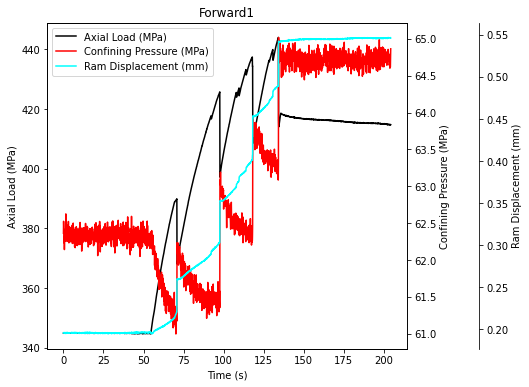

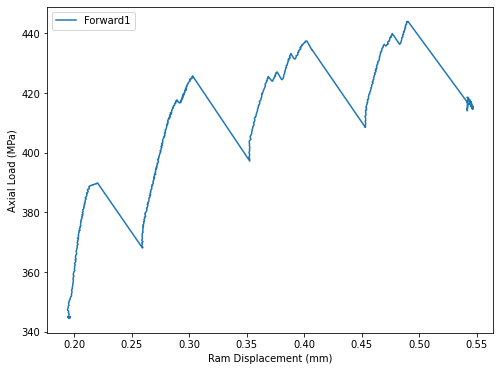

In [34]:
# can copy this code and change this filename variable to 'Decompress1' for example
Filename='Forward1'

#turn text data into numbers the arrays of numbers python can use
data=np.genfromtxt('/content/DecompressionData/W2623_'+Filename+'.csv', delimiter=',', skip_header=1)
axial_load=data[:,1]
confining_pressure=data[:,3]
lvdt2_displacement=data[:,5]

time=np.arange(len(axial_load))/10 #10 Hz data recording


#plot data together like https://matplotlib.org/3.4.3/gallery/ticks_and_spines/multiple_yaxis_with_spines.html
#generate a figure and axes
fig, axs0 = plt.subplots(figsize=(8,6))
fig.subplots_adjust(right=0.75)
axs1 = axs0.twinx()
axs2 = axs0.twinx()
axs2.spines["right"].set_position(("axes", 1.2))

#plot lines
l0, = axs0.plot(time, axial_load, color='black', label='Axial Load (MPa)')
l1, = axs1.plot(time, confining_pressure, color='red', label='Confining Pressure (MPa)')
l2, = axs2.plot(time, lvdt2_displacement, color='cyan', label='Ram Displacement (mm)')

#set titles/labels
plt.title(Filename)
axs0.set_xlabel("Time (s)")
axs0.set_ylabel("Axial Load (MPa)")
axs1.set_ylabel('Confining Pressure (MPa)')
axs2.set_ylabel('Ram Displacement (mm)')

#generate legend
lines = [l0, l1, l2] #
axs0.legend(lines, [l.get_label() for l in lines])

#save figure
fig.savefig(Filename+'_multiaxis_pyplot.png') #will show up to the left under the 'Files' sidebar


#plot as Load vs Displacement
plt.figure(figsize=(8,6))

plt.plot(lvdt2_displacement, axial_load, label=Filename)
plt.xlabel('Ram Displacement (mm)')
plt.ylabel('Axial Load (MPa)')
plt.legend()

In [ ]:
import scipy.signal as sig
